In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv
import seaborn as sns
sns.set_style("whitegrid")

In [63]:
# Importation data In-Vehicle Coupon Recommendation
data= pd.read_csv('CouponRecommendation.csv') 

In [48]:
# affichage du nombre de lignes et de colonnes
print("Taille initial du dataset:",data.shape)

Taille initial du dataset: (12684, 26)


In [49]:
# affichage six premières lignes
data.head(6)

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   
5  No Urgent Place  Friend(s)   Sunny           80   6PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   
5        Restaurant(<20)         2h  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   
5        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   
5                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  
5             1  1  

[6 rows x 26 columns]

In [7]:
# affichage six dernieres lignes
data.tail(6)

destination passanger weather  temperature  time                 coupon  \
12678        Home   Partner   Sunny           30  10PM        Restaurant(<20)   
12679        Home   Partner   Rainy           55   6PM  Carry out & Take away   
12680        Work     Alone   Rainy           55   7AM  Carry out & Take away   
12681        Work     Alone   Snowy           30   7AM           Coffee House   
12682        Work     Alone   Snowy           30   7AM                    Bar   
12683        Work     Alone   Sunny           80   7AM      Restaurant(20-50)   

      expiration gender age maritalStatus  ...  CoffeeHouse CarryAway  \
12678         2h   Male  26        Single  ...        never       1~3   
12679         1d   Male  26        Single  ...        never       1~3   
12680         1d   Male  26        Single  ...        never       1~3   
12681         1d   Male  26        Single  ...        never       1~3   
12682         1d   Male  26        Single  ...        never       1~3   
12683         2h   Male  26        Single  ...        never       1~3   

      RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
12678                  4~8              1~3                1   
12679                  4~8              1~3                1   
12680                  4~8              1~3                1   
12681                  4~8              1~3                1   
12682                  4~8              1~3                1   
12683                  4~8              1~3                1   

      toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  Y  
12678                 1                 0              1             0  0  
12679                 0                 0              1             0  1  
12680                 0                 0              0             1  1  
12681                 0                 0              1             0  0  
12682                 1                 1              0             1  0  
12683                 0                 0              1             0  0  

[6 rows x 26 columns]

In [236]:
# Informations sur les données 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [237]:
 data.describe()
#description de chaque colonne numérique

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [142]:
print("count : Le nombre d'entrées non nulles dans la colonne.")
print("mean : La valeur moyenne des données de la colonne.")
print("std : L'écart-type, qui mesure la dispersion des données autour de la moyenne. ")
print("min : La valeur minimale de la colonne.")
print("25% : Le premier quartile,la valeur au-dessous de laquelle se trouvent 25 % des données lorsqu'elles sont arrangées en ordre croissant.")
print("50% : La médiane est la valeur centrale d'un ensemble de données triées par ordre croissant. ")
print("75% : Le troisième quartile,la valeur au-dessous de laquelle se trouvent 75 % des données arrangées en ordre croissant.")
print("max : La valeur maximal de la colonne.")

count : Le nombre d'entrées non nulles dans la colonne.
mean : La valeur moyenne des données de la colonne.
std : L'écart-type, qui mesure la dispersion des données autour de la moyenne. 
min : La valeur minimale de la colonne.
25% : Le premier quartile,la valeur au-dessous de laquelle se trouvent 25 % des données lorsqu'elles sont arrangées en ordre croissant.
50% : La médiane est la valeur centrale d'un ensemble de données triées par ordre croissant. 
75% : Le troisième quartile,la valeur au-dessous de laquelle se trouvent 75 % des données arrangées en ordre croissant.
max : La valeur maximal de la colonne.


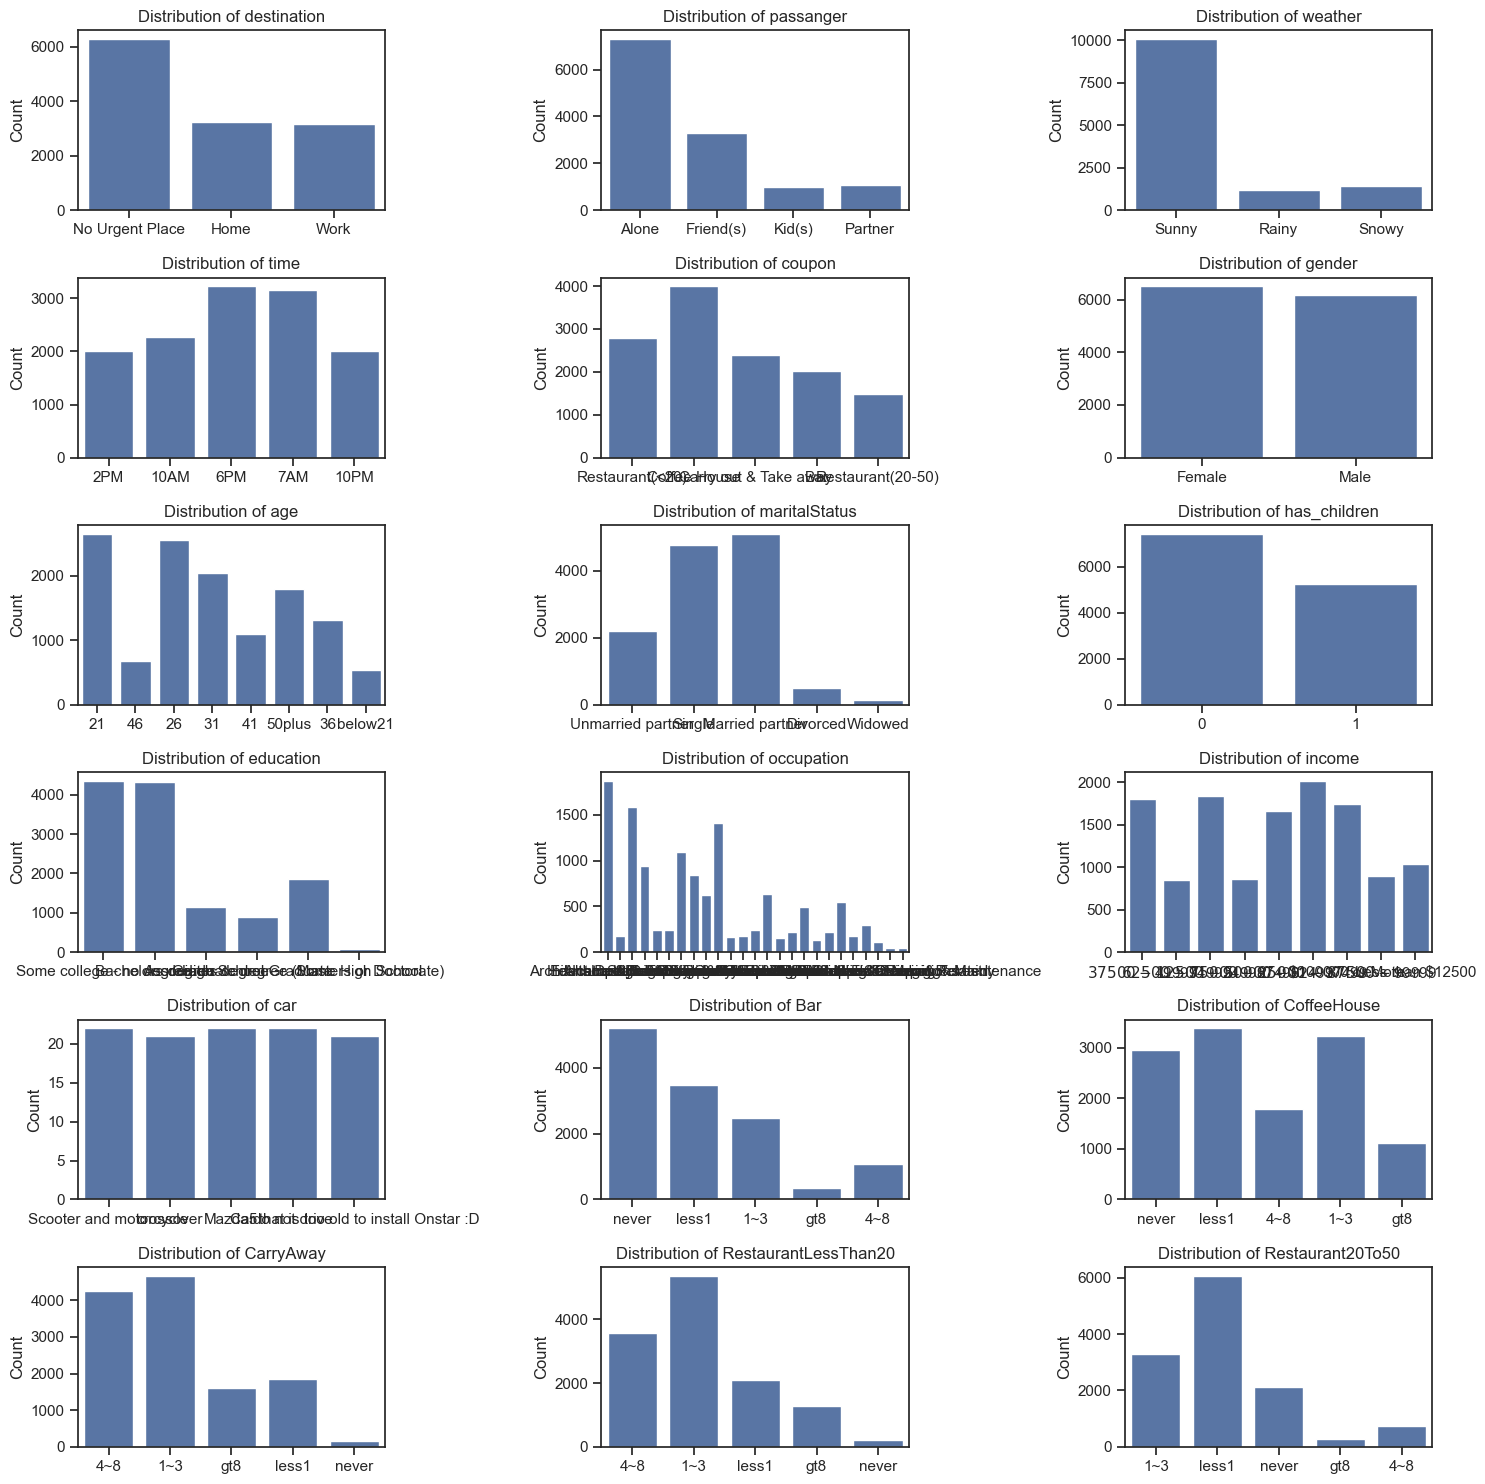

In [10]:
#Visualisation des colonnes
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = [ 'destination','passanger','weather','time','coupon',
    'gender', 'age', 'maritalStatus', 'has_children',
    'education', 'occupation', 'income', 'car', 'Bar',
    'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
]

# Set the plot style
sns.set(style="ticks")

# Calculate the number of rows and columns needed based on the number of categorical columns
num_columns = 3  # Set the number of columns per row
num_rows = (len(categorical_columns) - 1) // num_columns + 1  # Calculate the number of rows

# Create subplots for each categorical column
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Iterate through each categorical column and create a countplot
for i, column in enumerate(categorical_columns):
    row, col = i // num_columns, i % num_columns
    sns.countplot(data=data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')

# Remove any unused subplots
for i in range(len(categorical_columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


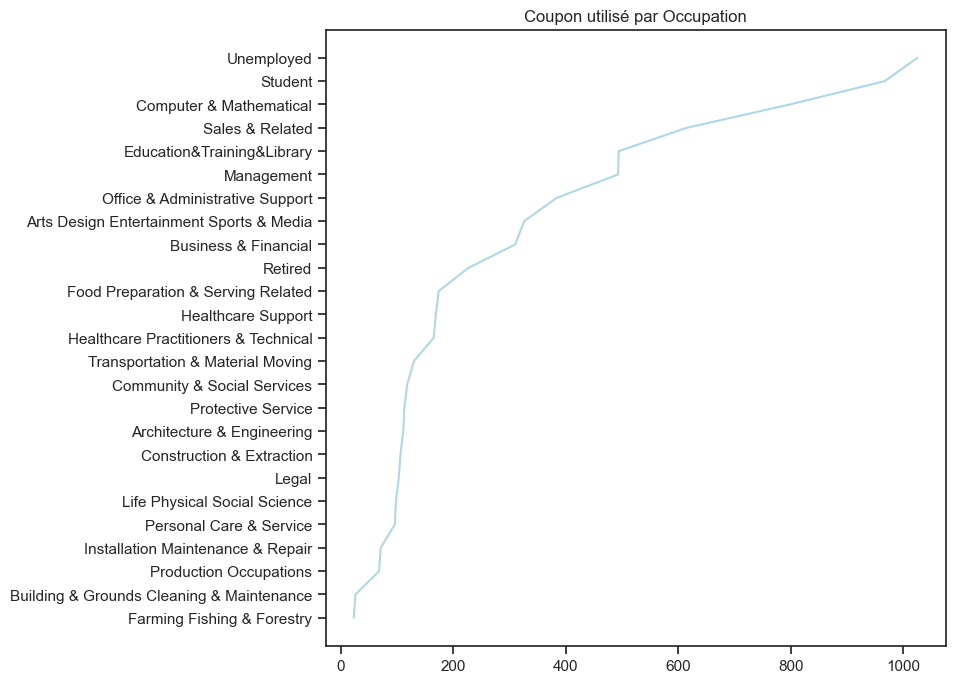

In [17]:
# Coupon utilisé par profession
# Filtrez les données pour la classe Y égale à 1
target_yes = data[data['Y'] == 1]

# Créez la figure et spécifiez les dimensions
plt.figure(figsize=(8, 8))

# Tracez un graphique à ligne avec les occupations
sns.lineplot(x=list(target_yes['occupation'].value_counts().to_dict().values()), 
             y=list(target_yes['occupation'].value_counts().to_dict().keys()), color='lightblue')

# Modifiez la couleur du fond du graphique
ax = plt.gca()
# Ajoutez un titre
plt.title('Coupon utilisé par Occupation')

# Affichez le graphique
plt.show()

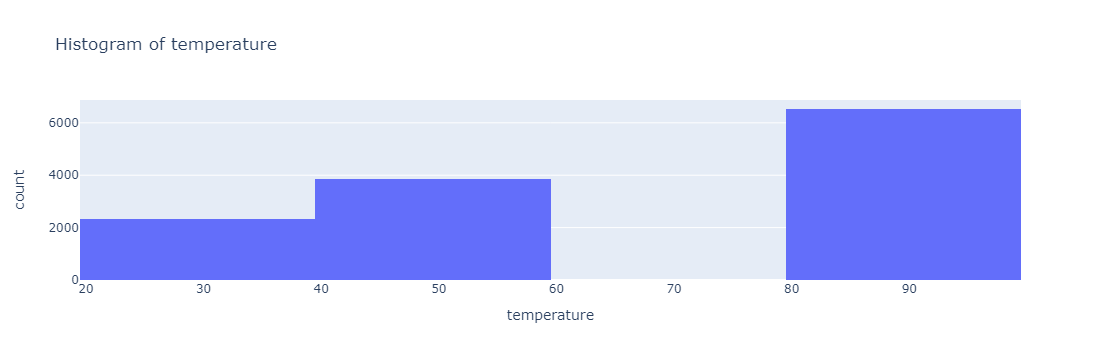

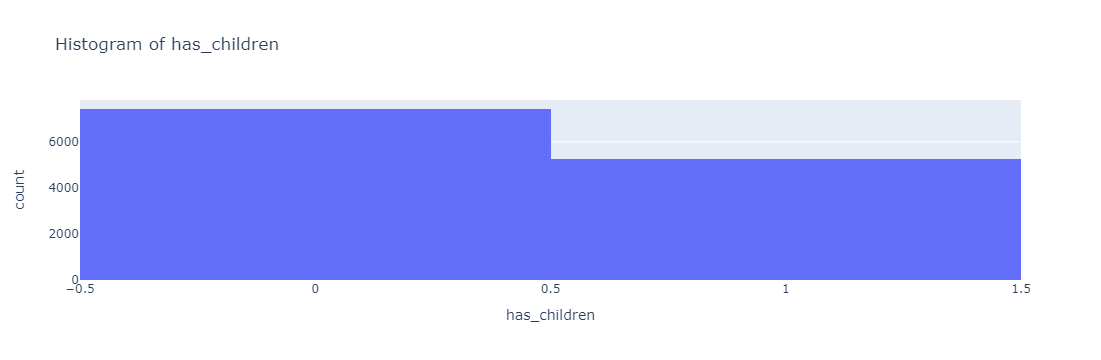

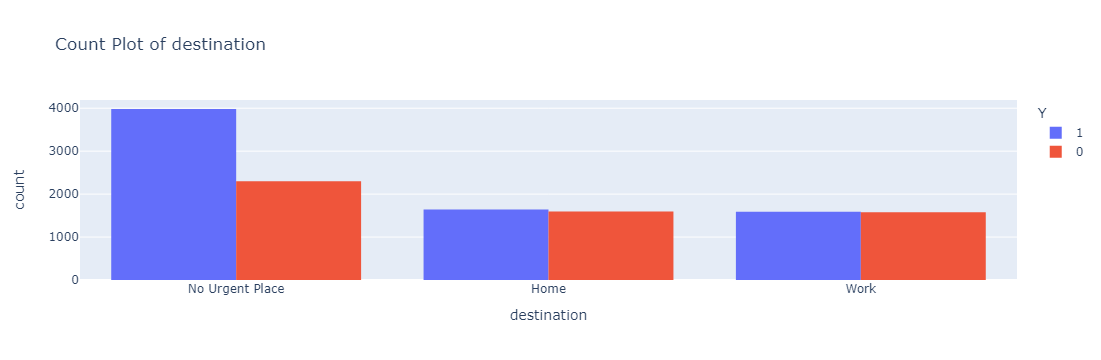

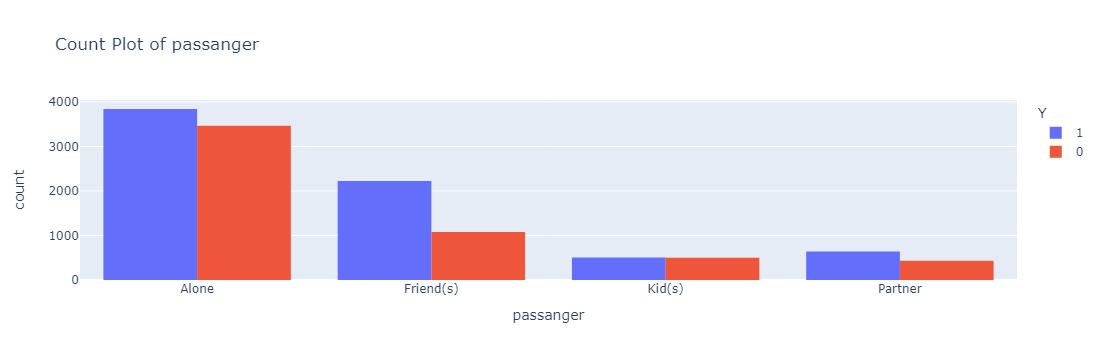

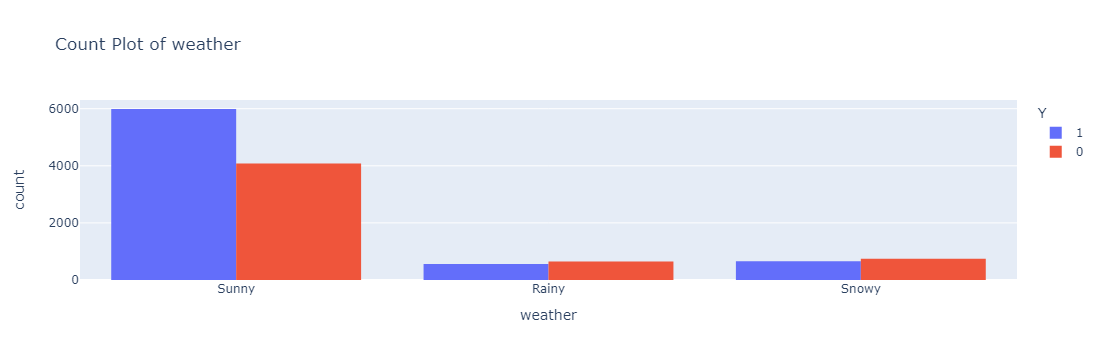

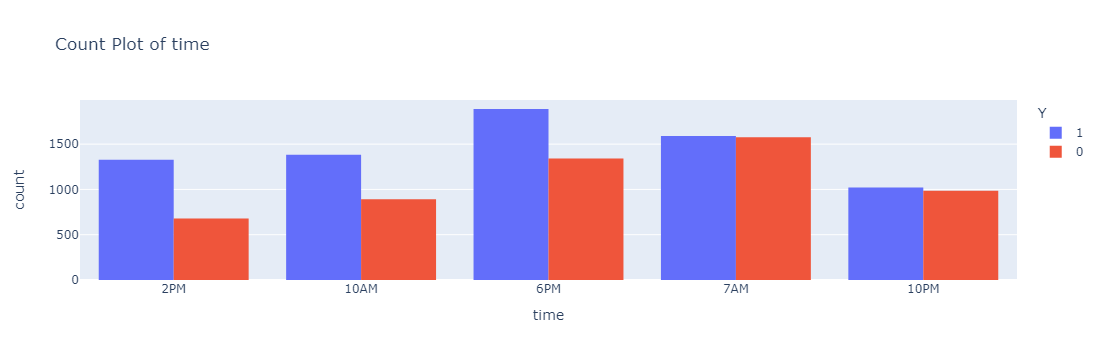

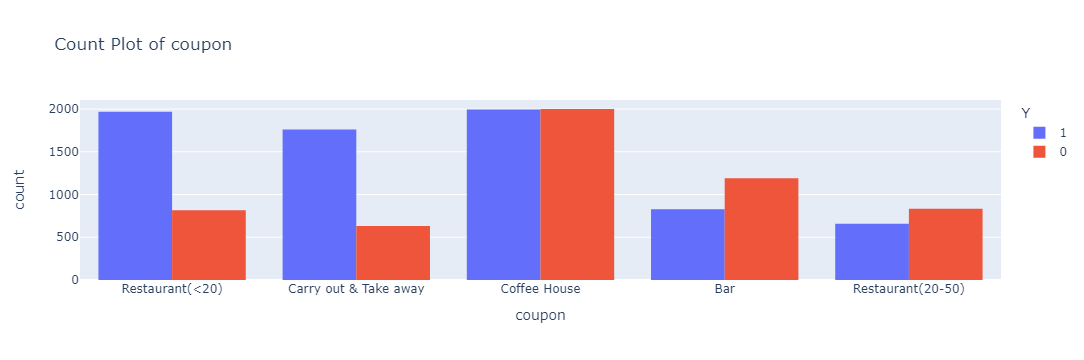

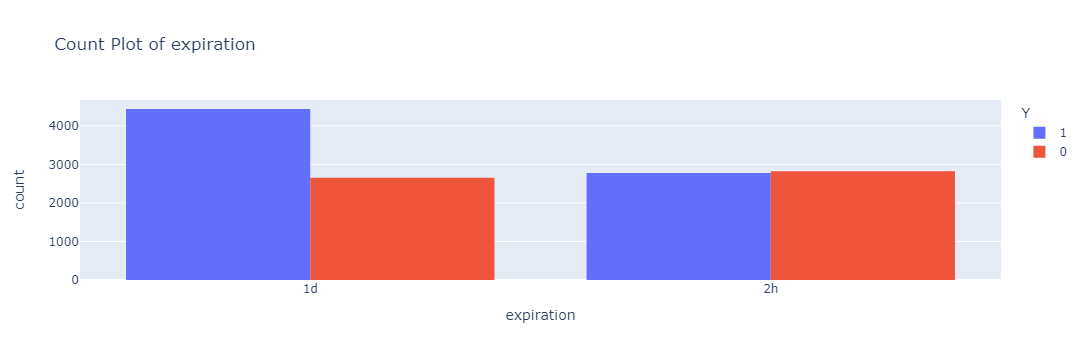

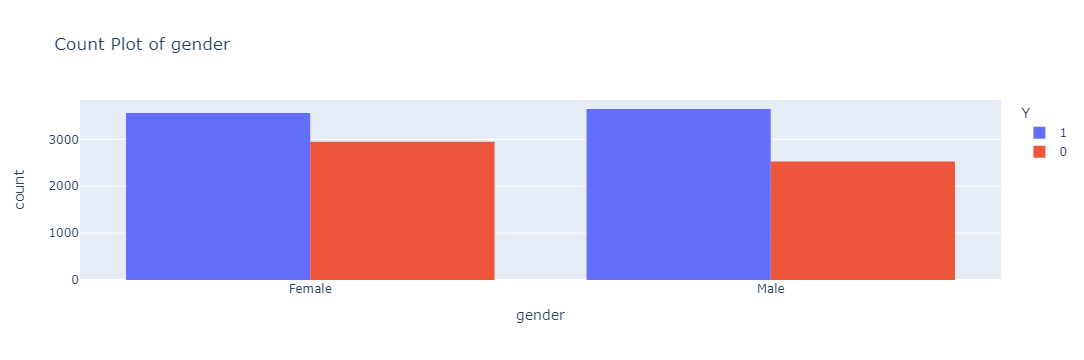

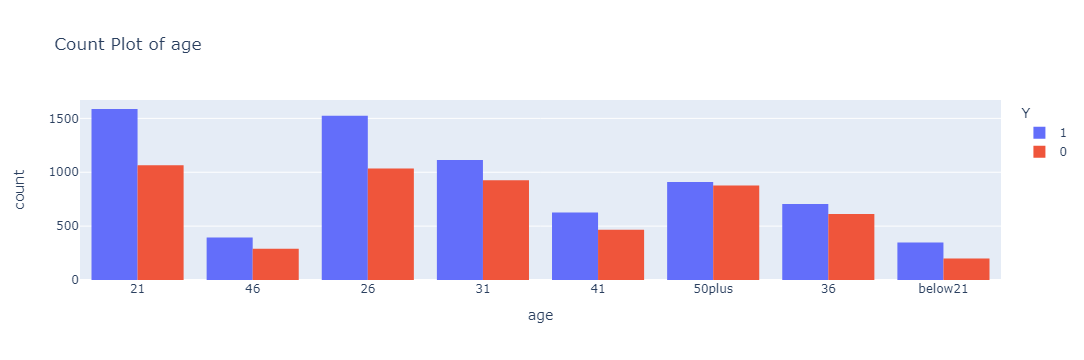

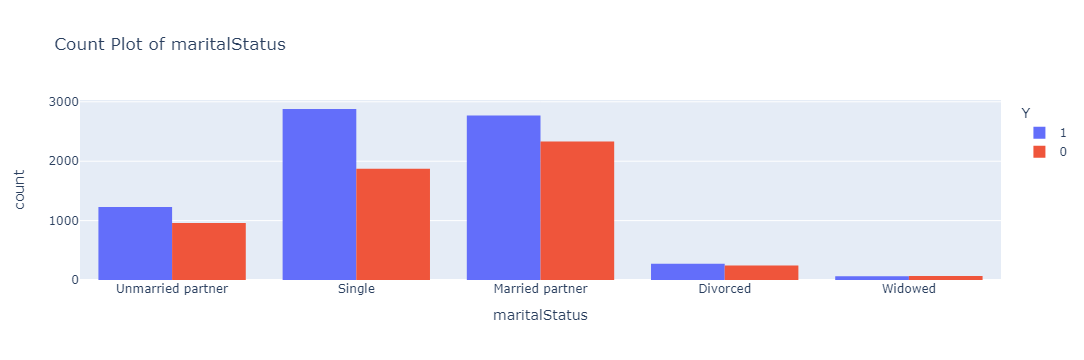

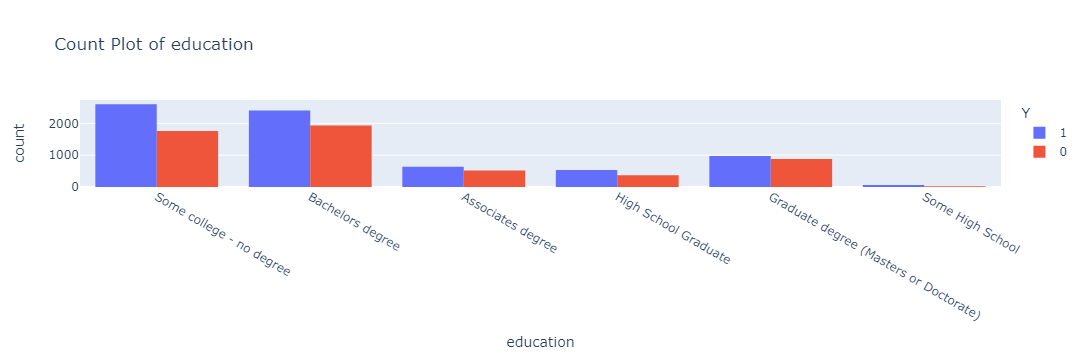

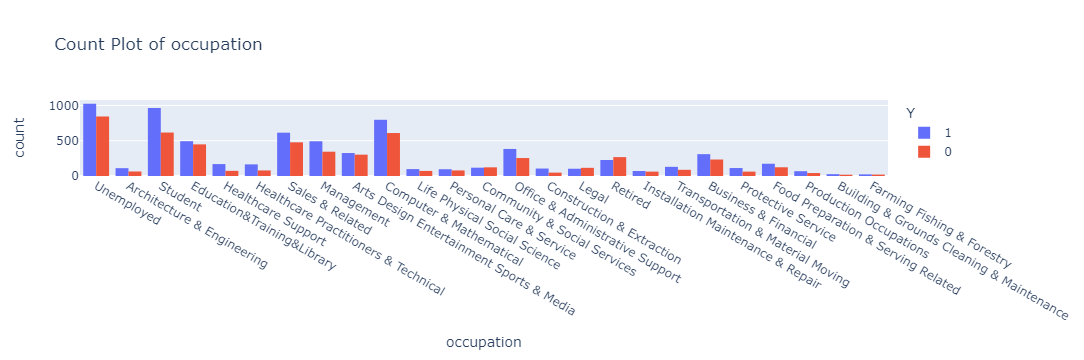

In [9]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'data'
categorical_features = [
    'destination', 'passanger', 'weather', 'time', 'coupon',
    'expiration', 'gender', 'age', 'maritalStatus', 'education',
    'occupation', 'income'
]

numerical_features = ['temperature', 'has_children']

# Create histograms for numerical features
for feature in numerical_features:
    fig = px.histogram(data_frame=data, x=feature, title=f'Histogram of {feature}', labels={feature: feature})
    fig.show()

# Create count plots for categorical features with the target variable
for feature in categorical_features:
    fig = px.histogram(data_frame=data, x=feature, color='Y', title=f'Count Plot of {feature}', labels={feature: feature}, barmode='group')
    fig.show()


In [238]:
# affichage des valeurs pour chaque colonne
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne destination: ['No Urgent Place' 'Home' 'Work']
Valeurs uniques pour la colonne passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Valeurs uniques pour la colonne weather: ['Sunny' 'Rainy' 'Snowy']
Valeurs uniques pour la colonne temperature: [55 80 30]
Valeurs uniques pour la colonne time: ['2PM' '10AM' '6PM' '7AM' '10PM']
Valeurs uniques pour la colonne coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Valeurs uniques pour la colonne expiration: ['1d' '2h']
Valeurs uniques pour la colonne gender: ['Female' 'Male']
Valeurs uniques pour la colonne age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Valeurs uniques pour la colonne maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Valeurs uniques pour la colonne has_children: [1 0]
Valeurs uniques pour la colonne education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate d

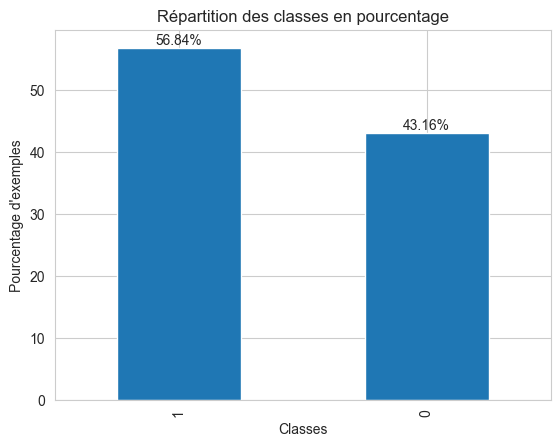

Cet ensemble des données présente un équilibre partiel, avec environ 57 % des étiquettes de classe indiquant l'acceptation et environ 43 % indiquant le rejet.


In [13]:
# Vérification de l'équilibrage du nôtre data
import matplotlib.pyplot as plt

# Comptez le nombre d'exemples par classe
class_counts = data['Y'].value_counts()

# Calculez les pourcentages
class_percentages = (class_counts / len(data)) * 100

# Créez un graphique à barres avec les pourcentages
ax = class_percentages.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()
print("Cet ensemble des données présente un équilibre partiel, avec environ 57 % des étiquettes de classe indiquant l'acceptation et environ 43 % indiquant le rejet.")

In [239]:
# Grouper les données par la colonne 'occupation'
grouped = data.groupby('occupation')

# Calculer le nombre total d'entrées
total_entries = len(data)

# Initialiser un dictionnaire pour stocker les pourcentages d'acceptation
percentage_acceptance = {}

# Parcourir chaque groupe
for group_name, group_data in grouped:
    # Compter le nombre d'entrées dans le groupe
    group_count = len(group_data)
    
    # Calculer le pourcentage d'acceptation (supposons que la colonne d'acceptation s'appelle 'acceptance')
    acceptance_count = group_data['Y'].sum()
    percentage = (acceptance_count / group_count) * 100
    
    # Stocker le pourcentage dans le dictionnaire
    percentage_acceptance[group_name] = percentage

# Afficher les pourcentages d'acceptation
for occupation, percentage in percentage_acceptance.items():
    print(f"{occupation}: {percentage:.2f}%")


Architecture & Engineering: 63.43%
Arts Design Entertainment Sports & Media: 51.83%
Building & Grounds Cleaning & Maintenance: 59.09%
Business & Financial: 56.99%
Community & Social Services: 48.96%
Computer & Mathematical: 56.68%
Construction & Extraction: 68.83%
Education&Training&Library: 52.39%
Farming Fishing & Forestry: 53.49%
Food Preparation & Serving Related: 58.39%
Healthcare Practitioners & Technical: 67.62%
Healthcare Support: 69.83%
Installation Maintenance & Repair: 53.38%
Legal: 47.03%
Life Physical Social Science: 57.65%
Management: 58.83%
Office & Administrative Support: 60.09%
Personal Care & Service: 54.86%
Production Occupations: 61.82%
Protective Service: 64.57%
Retired: 45.86%
Sales & Related: 56.27%
Student: 61.05%
Transportation & Material Moving: 59.63%
Unemployed: 54.81%


# data cleaning 

In [64]:
# Eliminer les données redondantes
data = data.drop_duplicates()
print("Taille du dataset après l'élimination des lignes dupliquée:",data.shape)
print("Il est observé qu'il y a 74 lignes qui sont dupliquées.")




Taille du dataset après l'élimination des lignes dupliquée: (12610, 26)
Il est observé qu'il y a 74 lignes qui sont dupliquées.


In [65]:
#valeurs nulles pour chaque colonne + pourcentage
missing_count = data.isnull().sum()
missing_percentage = (missing_count / len(data)) * 100
missing_data_info = pd.DataFrame({
    'Nom de la colonne': data.columns,
    'Nombre de valeurs manquantes': missing_count,
    'Pourcentage de valeurs manquantes': missing_percentage.round(3)
})
missing_data_info

Nom de la colonne  Nombre de valeurs manquantes  \
destination                    destination                             0   
passanger                        passanger                             0   
weather                            weather                             0   
temperature                    temperature                             0   
time                                  time                             0   
coupon                              coupon                             0   
expiration                      expiration                             0   
gender                              gender                             0   
age                                    age                             0   
maritalStatus                maritalStatus                             0   
has_children                  has_children                             0   
education                        education                             0   
occupation                      occupation                             0   
income                              income                             0   
car                                    car                         12502   
Bar                                    Bar                           107   
CoffeeHouse                    CoffeeHouse                           217   
CarryAway                        CarryAway                           150   
RestaurantLessThan20  RestaurantLessThan20                           129   
Restaurant20To50          Restaurant20To50                           189   
toCoupon_GEQ5min          toCoupon_GEQ5min                             0   
toCoupon_GEQ15min        toCoupon_GEQ15min                             0   
toCoupon_GEQ25min        toCoupon_GEQ25min                             0   
direction_same              direction_same                             0   
direction_opp                direction_opp                             0   
Y                                        Y                             0   

                      Pourcentage de valeurs manquantes  
destination                                       0.000  
passanger                                         0.000  
weather                                           0.000  
temperature                                       0.000  
time                                              0.000  
coupon                                            0.000  
expiration                                        0.000  
gender                                            0.000  
age                                               0.000  
maritalStatus                                     0.000  
has_children                                      0.000  
education                                         0.000  
occupation                                        0.000  
income                                            0.000  
car                                              99.144  
Bar                                               0.849  
CoffeeHouse                                       1.721  
CarryAway                                         1.190  
RestaurantLessThan20                              1.023  
Restaurant20To50                                  1.499  
toCoupon_GEQ5min                                  0.000  
toCoupon_GEQ15min                                 0.000  
toCoupon_GEQ25min                                 0.000  
direction_same                                    0.000  
direction_opp                                     0.000  
Y                                                 0.000

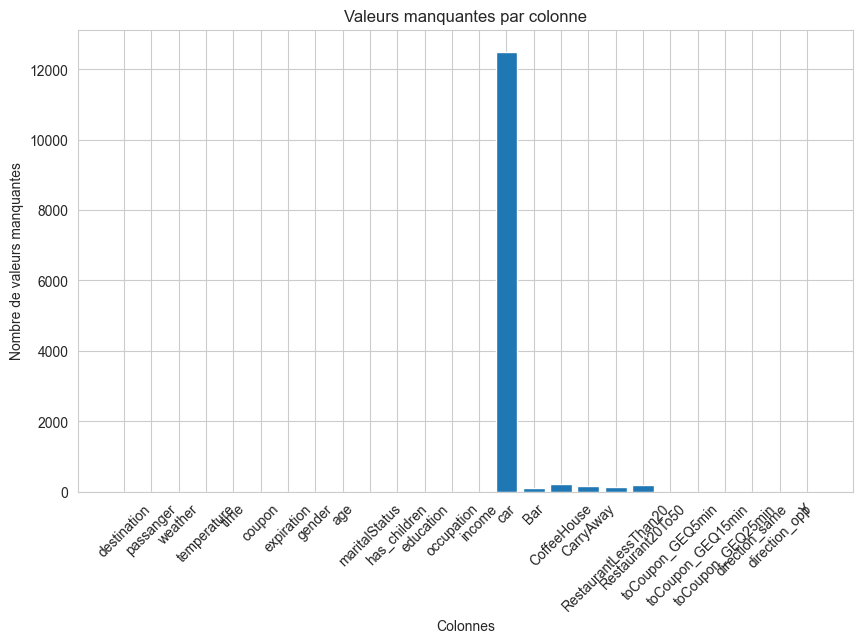

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Créez un masque de booléens indiquant les valeurs manquantes
missing_mask = data.isnull()

# Comptez le nombre de valeurs manquantes dans chaque colonne
missing_count = missing_mask.sum()

# Créez un graphique à barres pour représenter les valeurs manquantes
plt.figure(figsize=(10, 6))
plt.bar(missing_count.index, missing_count)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Valeurs manquantes par colonne')
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe x pour une meilleure lisibilité
plt.show()


In [67]:
# Supprimer la colonne car ( 99% des valeurs sont manquantes ) 
data = data.drop('car', axis=1)
data.shape

(12610, 25)

In [68]:
# La  matrice de corrélation
# Exclure les colonnes non numériques 
numerical_data = data.select_dtypes(include='number')

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Afficher la matrice de corrélation
correlation_matrix


temperature  has_children  toCoupon_GEQ5min  \
temperature           1.000000     -0.018599               NaN   
has_children         -0.018599      1.000000               NaN   
toCoupon_GEQ5min           NaN           NaN               NaN   
toCoupon_GEQ15min    -0.157089      0.079434               NaN   
toCoupon_GEQ25min    -0.227165     -0.010773               NaN   
direction_same        0.097972     -0.032353               NaN   
direction_opp        -0.097972      0.032353               NaN   
Y                     0.059393     -0.045056               NaN   

                   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
temperature                -0.157089          -0.227165        0.097972   
has_children                0.079434          -0.010773       -0.032353   
toCoupon_GEQ5min                 NaN                NaN             NaN   
toCoupon_GEQ15min           1.000000           0.321260       -0.302066   
toCoupon_GEQ25min           0.321260           1.000000       -0.189900   
direction_same             -0.302066          -0.189900        1.000000   
direction_opp               0.302066           0.189900       -1.000000   
Y                          -0.082693          -0.108139        0.014932   

                   direction_opp         Y  
temperature            -0.097972  0.059393  
has_children            0.032353 -0.045056  
toCoupon_GEQ5min             NaN       NaN  
toCoupon_GEQ15min       0.302066 -0.082693  
toCoupon_GEQ25min       0.189900 -0.108139  
direction_same         -1.000000  0.014932  
direction_opp           1.000000 -0.014932  
Y                      -0.014932  1.000000

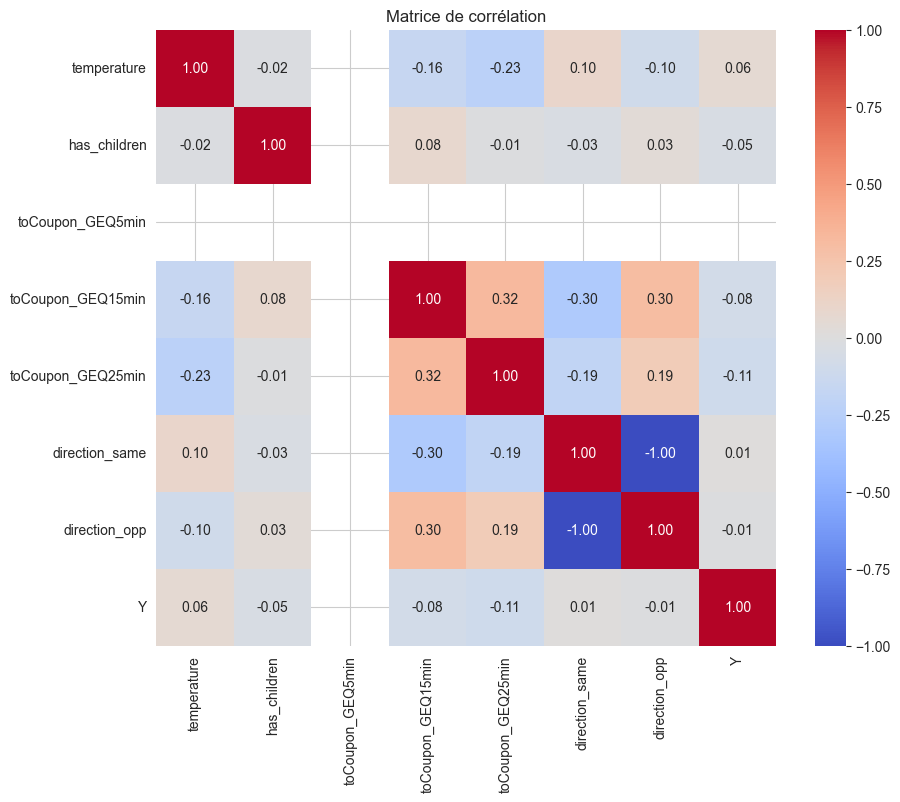

In [69]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [121]:
print("'Direction_same' et 'direction_opp' présentent une corrélation parfaite de -1, ce qui signifie qu'elles sont parfaitement inverses l'une de l'autre.")
print("Cette corrélation parfaite indique qu'elles portent en réalité la même information, mais dans des sens opposés. ")
print("Par conséquent, il n'est pas nécessaire de conserver les deux fonctionnalités, car elles fournissent essentiellement la même information")
print("Une des deux fonctionnalités pourrait être supprimée pour simplifier le modèle.")
print("La fonctionnalité 'toCoupon_GEQ5min' ne présente pas de corrélation significative avec la fonction cible")
print("car elle a la même valeur '1' pour tous les points de données, ce qui signifie qu'elle ne varie pas et ne contribue pas à expliquer ou prédire la fonction cible.")
print("il faut donc supprimer les fonctionnalités 'direction_opp' et 'toCoupon_GEQ5min' car elles ont moins d'importance et n'aideront pas beaucoup à la prédiction.")

'Direction_same' et 'direction_opp' présentent une corrélation parfaite de -1, ce qui signifie qu'elles sont parfaitement inverses l'une de l'autre.
Cette corrélation parfaite indique qu'elles portent en réalité la même information, mais dans des sens opposés. 
Par conséquent, il n'est pas nécessaire de conserver les deux fonctionnalités, car elles fournissent essentiellement la même information
Une des deux fonctionnalités pourrait être supprimée pour simplifier le modèle.
La fonctionnalité 'toCoupon_GEQ5min' ne présente pas de corrélation significative avec la fonction cible
car elle a la même valeur '1' pour tous les points de données, ce qui signifie qu'elle ne varie pas et ne contribue pas à expliquer ou prédire la fonction cible.
il faut donc supprimer les fonctionnalités 'direction_opp' et 'toCoupon_GEQ5min' car elles ont moins d'importance et n'aideront pas beaucoup à la prédiction.


In [70]:
# Supprimer la colonne toCoupon_GEQ5min ( toCoupon_GEQ5min prend la meme valeurs pour tout les lignes 1  ) et la colonne direction_opp
data = data.drop(['direction_opp','toCoupon_GEQ5min'], axis=1)
data.shape

(12610, 23)

In [23]:
filtered_data = data[(data['toCoupon_GEQ15min'] == 0) & (data['toCoupon_GEQ25min'] == 1)]

# Affichez les lignes filtrées
filtered_data


Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, Y]
Index: []

[0 rows x 23 columns]

In [71]:
data['to_coupon_GEQmin'] = 0  # Default value

# Assign values based on conditions
data.loc[(data['toCoupon_GEQ15min'] == 1) & (data['toCoupon_GEQ25min'] == 0), 'to_coupon_GEQmin'] = 1
data.loc[(data['toCoupon_GEQ25min'] == 1), 'to_coupon_GEQmin'] = 2
print(data['to_coupon_GEQmin'])
data = data.drop(['toCoupon_GEQ25min','toCoupon_GEQ15min'], axis=1)
data.shape

0        0
1        0
2        1
3        1
4        1
        ..
12679    0
12680    0
12681    0
12682    2
12683    0
Name: to_coupon_GEQmin, Length: 12610, dtype: int64


(12610, 22)

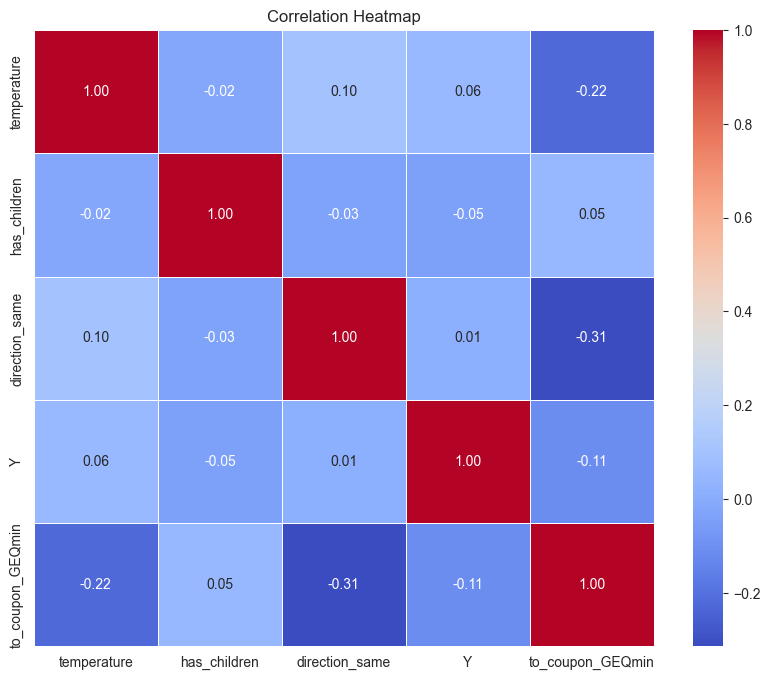

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionnez uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


In [73]:
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers_iqr(data, threshold=1.5):
    outliers = pd.DataFrame()

    for column in data.columns:
        if data[column].dtype in [int, float]:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            outliers = pd.concat([outliers, column_outliers])

    

    return outliers
outliers = detect_outliers_iqr(data)
print(outliers)

Empty DataFrame
Columns: []
Index: []


In [74]:
# remplacer les valeurs manquants par la valeur la plus frequente (most frequent value)
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
# Verification s'il ya des valeurs manquants
if data.isnull().values.any() :

    print("Il y a toujours des valeurs manquantes dans les données.")
else:
    print("Il n'y a plus de valeurs manquantes dans les données.")


Il n'y a plus de valeurs manquantes dans les données.


# data transformation

In [75]:
data_encoded = pd.get_dummies(data, columns=['destination'], prefix='dest')
data_encoded = pd.get_dummies(data_encoded, columns=['passanger'], prefix='passan')
data_encoded = pd.get_dummies(data_encoded, columns=['coupon'], prefix='coupon')
data_encoded= pd.get_dummies(data_encoded,columns=['weather'], prefix='weather')
data_encoded
# data_encoded.info()
# data.shape

temperature  time expiration  gender age      maritalStatus  \
0               55   2PM         1d  Female  21  Unmarried partner   
1               80  10AM         2h  Female  21  Unmarried partner   
2               80  10AM         2h  Female  21  Unmarried partner   
3               80   2PM         2h  Female  21  Unmarried partner   
4               80   2PM         1d  Female  21  Unmarried partner   
...            ...   ...        ...     ...  ..                ...   
12679           55   6PM         1d    Male  26             Single   
12680           55   7AM         1d    Male  26             Single   
12681           30   7AM         1d    Male  26             Single   
12682           30   7AM         1d    Male  26             Single   
12683           80   7AM         2h    Male  26             Single   

       has_children                 education       occupation  \
0                 1  Some college - no degree       Unemployed   
1                 1  Some college - no degree       Unemployed   
2                 1  Some college - no degree       Unemployed   
3                 1  Some college - no degree       Unemployed   
4                 1  Some college - no degree       Unemployed   
...             ...                       ...              ...   
12679             0          Bachelors degree  Sales & Related   
12680             0          Bachelors degree  Sales & Related   
12681             0          Bachelors degree  Sales & Related   
12682             0          Bachelors degree  Sales & Related   
12683             0          Bachelors degree  Sales & Related   

                income  ... passan_Kid(s) passan_Partner coupon_Bar  \
0      $37500 - $49999  ...         False          False      False   
1      $37500 - $49999  ...         False          False      False   
2      $37500 - $49999  ...         False          False      False   
3      $37500 - $49999  ...         False          False      False   
4      $37500 - $49999  ...         False          False      False   
...                ...  ...           ...            ...        ...   
12679  $75000 - $87499  ...         False           True      False   
12680  $75000 - $87499  ...         False          False      False   
12681  $75000 - $87499  ...         False          False      False   
12682  $75000 - $87499  ...         False          False       True   
12683  $75000 - $87499  ...         False          False      False   

      coupon_Carry out & Take away coupon_Coffee House  \
0                            False               False   
1                            False                True   
2                             True               False   
3                            False                True   
4                            False                True   
...                            ...                 ...   
12679                         True               False   
12680                         True               False   
12681                        False                True   
12682                        False               False   
12683                        False               False   

       coupon_Restaurant(20-50)  coupon_Restaurant(<20)  weather_Rainy  \
0                         False                    True          False   
1                         False                   False          False   
2                         False                   False          False   
3                         False                   False          False   
4                         False                   False          False   
...                         ...                     ...            ...   
12679                     False                   False           True   
12680                     False                   False           True   
12681                     False                   False          False   
12682                     False                   False          False   
12683    

In [76]:
bool_columns = [
    'dest_Home', 'dest_No Urgent Place', 'dest_Work',
    'passan_Alone', 'passan_Friend(s)', 'passan_Kid(s)', 'passan_Partner',
    'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
    'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)',
    'weather_Rainy', 'weather_Snowy', 'weather_Sunny'
]

# Appliquer la conversion en entier (0 ou 1) aux colonnes booléennes
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

data_encoded
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   temperature                   12610 non-null  int64 
 1   time                          12610 non-null  object
 2   expiration                    12610 non-null  object
 3   gender                        12610 non-null  object
 4   age                           12610 non-null  object
 5   maritalStatus                 12610 non-null  object
 6   has_children                  12610 non-null  int64 
 7   education                     12610 non-null  object
 8   occupation                    12610 non-null  object
 9   income                        12610 non-null  object
 10  Bar                           12610 non-null  object
 11  CoffeeHouse                   12610 non-null  object
 12  CarryAway                     12610 non-null  object
 13  RestaurantLessThan20 

In [77]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder = OrdinalEncoder(categories=[['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999' ,'$75000 - $87499',
'$87500 - $99999','$100000 or More']])
data_encoded.income = encoder.fit_transform(data_encoded.income.values.reshape(-1, 1))
encoder1=OrdinalEncoder()
encoder1=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.Bar= encoder1.fit_transform(data_encoded.Bar.values.reshape(-1, 1))
encoder2=OrdinalEncoder()
encoder2=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.CoffeeHouse= encoder1.fit_transform(data_encoded.CoffeeHouse.values.reshape(-1, 1))
encoder3=OrdinalEncoder()
encoder3=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.CarryAway= encoder1.fit_transform(data_encoded.CarryAway.values.reshape(-1, 1))
data_encoded.CarryAway
encoder4=OrdinalEncoder()
encoder4=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.RestaurantLessThan20= encoder1.fit_transform(data_encoded.RestaurantLessThan20.values.reshape(-1, 1))
encoder5=OrdinalEncoder()
encoder5=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.Restaurant20To50= encoder1.fit_transform(data_encoded.Restaurant20To50.values.reshape(-1, 1))
encoder6=OrdinalEncoder()
encoder6=OrdinalEncoder(categories=[['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)']])
data_encoded.education= encoder6.fit_transform(data_encoded.education.values.reshape(-1, 1))
# Définissez le dictionnaire de mappage
occupation_dict = {
    'Healthcare Support': 'Medium_High_Acceptance',
    'Construction & Extraction': 'Medium_High_Acceptance',
    'Healthcare Practitioners & Technical': 'Medium_High_Acceptance',
    'Protective Service': 'Medium_High_Acceptance',
    'Architecture & Engineering': 'Medium_High_Acceptance',
    'Production Occupations': 'Medium_High_Acceptance',
    'Student': 'Medium_High_Acceptance',
    'Office & Administrative Support': 'Medium_High_Acceptance',
    'Transportation & Material Moving': 'Medium_Acceptance',
    'Building & Grounds Cleaning & Maintenance': 'Medium_Acceptance',
    'Management': 'Medium_Acceptance',
    'Food Preparation & Serving Related': 'Medium_Acceptance',
    'Life Physical Social Science': 'Medium_Acceptance',
    'Business & Financial': 'Medium_Acceptance',
    'Computer & Mathematical': 'Medium_Acceptance',
    'Sales & Related': 'Medium_Acceptance',
    'Personal Care & Service': 'Medium_Acceptance',
    'Unemployed': 'Medium_Acceptance',
    'Farming Fishing & Forestry': 'Medium_Acceptance',
    'Installation Maintenance & Repair': 'Medium_Acceptance',
    'Education&Training&Library': 'Medium_Acceptance',
    'Arts Design Entertainment Sports & Media': 'Medium_Acceptance',
    'Community & Social Services': 'Medium_Low_Acceptance',
    'Legal': 'Medium_Low_Acceptance',
    'Retired': 'Medium_Low_Acceptance'
}
data_encoded['occupation'] = data_encoded['occupation'].map(occupation_dict)
encoder7 = OrdinalEncoder()
encoder7 = OrdinalEncoder(categories=[ ['Medium_Low_Acceptance','Medium_Acceptance','Medium_High_Acceptance']])
data_encoded.occupation = encoder7.fit_transform(data_encoded.occupation.values.reshape(-1, 1))

# data_encoded.info()
# print(data_encoded['occupation']==0)
data_encoded
# filtered_data = data_encoded.loc[data_encoded['occupation'] == 2]

temperature  time expiration  gender age      maritalStatus  \
0               55   2PM         1d  Female  21  Unmarried partner   
1               80  10AM         2h  Female  21  Unmarried partner   
2               80  10AM         2h  Female  21  Unmarried partner   
3               80   2PM         2h  Female  21  Unmarried partner   
4               80   2PM         1d  Female  21  Unmarried partner   
...            ...   ...        ...     ...  ..                ...   
12679           55   6PM         1d    Male  26             Single   
12680           55   7AM         1d    Male  26             Single   
12681           30   7AM         1d    Male  26             Single   
12682           30   7AM         1d    Male  26             Single   
12683           80   7AM         2h    Male  26             Single   

       has_children  education  occupation  income  ...  passan_Kid(s)  \
0                 1        2.0         1.0     3.0  ...              0   
1                 1        2.0         1.0     3.0  ...              0   
2                 1        2.0         1.0     3.0  ...              0   
3                 1        2.0         1.0     3.0  ...              0   
4                 1        2.0         1.0     3.0  ...              0   
...             ...        ...         ...     ...  ...            ...   
12679             0        4.0         1.0     6.0  ...              0   
12680             0        4.0         1.0     6.0  ...              0   
12681             0        4.0         1.0     6.0  ...              0   
12682             0        4.0         1.0     6.0  ...              0   
12683             0        4.0         1.0     6.0  ...              0   

       passan_Partner  coupon_Bar  coupon_Carry out & Take away  \
0                   0           0                             0   
1                   0           0                             0   
2                   0           0                             1   
3                   0           0                             0   
4                   0           0                             0   
...               ...         ...                           ...   
12679               1           0                             1   
12680               0           0                             1   
12681               0           0                             0   
12682               0           1                             0   
12683               0           0                             0   

       coupon_Coffee House  coupon_Restaurant(20-50)  coupon_Restaurant(<20)  \
0                        0                         0                       1   
1                        1                         0                       0   
2                        0                         0                       0   
3                        1                         0                       0   
4                        1                         0                       0   
...                    ...                       ...                     ...   
12679                    0                         0                       0   
12680                    0                         0                       0   
12681                    1                         0                       0   
12682                    0                         0                       0   
12683                    0                         1                       0   

       weather_Rainy  weather_Snowy  weather_Sunny  
0                  0              0              1  
1                  0              0              1  
2                  0              0              1  
3                  0              0              1  
4                  0              0              1  
...              ...            ...            ...  
12679              1              0              0  
12680              1              0              0  
12681              0              

In [78]:
for column in data_encoded.columns:
    unique_values = data_encoded[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne temperature: [55 80 30]
Valeurs uniques pour la colonne time: ['2PM' '10AM' '6PM' '7AM' '10PM']
Valeurs uniques pour la colonne expiration: ['1d' '2h']
Valeurs uniques pour la colonne gender: ['Female' 'Male']
Valeurs uniques pour la colonne age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Valeurs uniques pour la colonne maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Valeurs uniques pour la colonne has_children: [1 0]
Valeurs uniques pour la colonne education: [2. 4. 3. 1. 5. 0.]
Valeurs uniques pour la colonne occupation: [1. 2. 0.]
Valeurs uniques pour la colonne income: [3. 5. 1. 6. 4. 2. 8. 7. 0.]
Valeurs uniques pour la colonne Bar: [0. 1. 2. 4. 3.]
Valeurs uniques pour la colonne CoffeeHouse: [0. 1. 3. 2. 4.]
Valeurs uniques pour la colonne CarryAway: [2. 3. 4. 1. 0.]
Valeurs uniques pour la colonne RestaurantLessThan20: [3. 2. 1. 4. 0.]
Valeurs uniques pour la colonne Restaurant20To50: [2. 1. 0. 4. 3.]


In [79]:
# Créer un dictionnaire de correspondance catégorie -> entier
category_mapping_time = {
    '2PM': 14,
     '10AM': 10,
     '6PM': 18,
     '7AM': 7,
    '10PM': 22
 }

category_mapping_expiration = {
    '1d': 24,
    '2h': 2
 }
    
category_mapping_gender = {
     'Female': 0,
     'Male': 1
 }
category_mapping_age = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
     '36': 36,
   '41': 41,
   '46': 46,
    '50plus': 50
}

category_mapping_marital = {
 'Unmarried partner':0,
      'Single':1,
      'Married partner':2,
      'Divorced': 3,
      'Widowed': 4
 }


data_encoded['time'] = data_encoded['time'].map(category_mapping_time)
data_encoded['expiration'] = data_encoded['expiration'].map(category_mapping_expiration)
data_encoded['gender'] = data_encoded['gender'].map(category_mapping_gender)
data_encoded['age'] = data_encoded['age'].map(category_mapping_age)
data_encoded['maritalStatus']=data_encoded['maritalStatus'].map(category_mapping_marital)

# Effectuer l'encodage numérique de la colonne "destination"
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature                   12610 non-null  int64  
 1   time                          12610 non-null  int64  
 2   expiration                    12610 non-null  int64  
 3   gender                        12610 non-null  int64  
 4   age                           12610 non-null  int64  
 5   maritalStatus                 12610 non-null  int64  
 6   has_children                  12610 non-null  int64  
 7   education                     12610 non-null  float64
 8   occupation                    12610 non-null  float64
 9   income                        12610 non-null  float64
 10  Bar                           12610 non-null  float64
 11  CoffeeHouse                   12610 non-null  float64
 12  CarryAway                     12610 non-null  float64
 13  Restau

# Standardization

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded.temperature=scaler.fit_transform(data_encoded.temperature.values.reshape(-1, 1)) 
scaler1 = StandardScaler()
data_encoded.time=scaler1.fit_transform(data_encoded.time.values.reshape(-1, 1)) 
scaler2 = StandardScaler()
data_encoded.expiration=scaler2.fit_transform(data_encoded.expiration.values.reshape(-1, 1)) 
scaler3 = StandardScaler()
data_encoded.age=scaler3.fit_transform(data_encoded.age.values.reshape(-1, 1)) 
scaler4 = StandardScaler()
data_encoded.education=scaler4.fit_transform(data_encoded.education.values.reshape(-1, 1)) 
scaler5 = StandardScaler()
data_encoded.occupation=scaler5.fit_transform(data_encoded.occupation.values.reshape(-1, 1)) 
scaler6 = StandardScaler()
data_encoded.income=scaler6.fit_transform(data_encoded.income.values.reshape(-1, 1)) 
scaler7 = StandardScaler()
data_encoded.Bar=scaler7.fit_transform(data_encoded.Bar.values.reshape(-1, 1)) 
scaler8 = StandardScaler()
data_encoded.CoffeeHouse=scaler8.fit_transform(data_encoded.CoffeeHouse.values.reshape(-1, 1)) 
scaler9 = StandardScaler()
data_encoded.CarryAway=scaler9.fit_transform(data_encoded.CarryAway.values.reshape(-1, 1)) 
scaler10 = StandardScaler()
data_encoded.RestaurantLessThan20=scaler10.fit_transform(data_encoded.RestaurantLessThan20.values.reshape(-1, 1)) 
scaler11 = StandardScaler()
data_encoded.Restaurant20To50=scaler11.fit_transform(data_encoded.Restaurant20To50.values.reshape(-1, 1)) 
data_encoded
data_encoded.describe()

temperature          time    expiration        gender           age  \
count  1.261000e+04  1.261000e+04  1.261000e+04  12610.000000  1.261000e+04   
mean  -1.803122e-16 -5.409366e-17 -9.015610e-17      0.486994 -2.456754e-16   
std    1.000040e+00  1.000040e+00  1.000040e+00      0.499851  1.000040e+00   
min   -1.736955e+00 -1.266176e+00 -1.122614e+00      0.000000 -1.206179e+00   
25%   -4.316509e-01 -7.108845e-01 -1.122614e+00      0.000000 -1.108006e+00   
50%    8.736531e-01  2.950398e-02  8.907783e-01      0.000000 -1.262778e-01   
75%    8.736531e-01  7.698924e-01  8.907783e-01      1.000000  8.554502e-01   
max    8.736531e-01  1.510281e+00  8.907783e-01      1.000000  1.739005e+00   

       maritalStatus  has_children     education    occupation        income  \
count   12610.000000  12610.000000  1.261000e+04  1.261000e+04  1.261000e+04   
mean        1.340603      0.414512 -6.310927e-17 -4.507805e-18 -3.606244e-17   
std         0.845046      0.492657  1.000040e+00  1.000040e+00  1.000040e+00   
min         0.000000      0.000000 -2.473383e+00 -2.156855e+00 -1.468257e+00   
25%         1.000000      0.000000 -8.909702e-01 -3.399039e-01 -6.817685e-01   
50%         1.000000      0.000000 -9.976356e-02 -3.399039e-01 -2.885245e-01   
75%         2.000000      1.000000  6.914430e-01  1.477047e+00  8.912076e-01   
max         4.000000      1.000000  1.482650e+00  1.477047e+00  1.677696e+00   

       ...  passan_Kid(s)  passan_Partner    coupon_Bar  \
count  ...   12610.000000    12610.000000  12610.000000   
mean   ...       0.079381        0.084774      0.159397   
std    ...       0.270344        0.278556      0.366061   
min    ...       0.000000        0.000000      0.000000   
25%    ...       0.000000        0.000000      0.000000   
50%    ...       0.000000        0.000000      0.000000   
75%    ...       0.000000        0.000000      0.000000   
max    ...       1.000000        1.000000      1.000000   

       coupon_Carry out & Take away  coupon_Coffee House  \
count                  12610.000000         12610.000000   
mean                       0.185884             0.316336   
std                        0.389029             0.465064   
min                        0.000000             0.000000   
25%                        0.000000             0.000000   
50%                        0.000000             0.000000   
75%                        0.000000             1.000000   
max                        1.000000             1.000000   

       coupon_Restaurant(20-50)  coupon_Restaurant(<20)  weather_Rainy  \
count              12610.000000            12610.000000   12610.000000   
mean                   0.118002                0.220381       0.095321   
std                    0.322623                0.414520       0.293670   
min                    0.000000                0.000000       0.000000   
25%                    0.000000                0.000000       0.000000   
50%                    0.000000                0.000000       0.000000   
75%                    0.000000                0.000000       0.000000   
max                    1.000000                1.000000       1.000000   

       weather_Snowy  weather_Sunny  
count   12610.000000   12610.000000  
mean        0.110785       0.793894  
std         0.313878       0.404524  
min         0.000000       0.000000  
25%         0.000000       1.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000  

[8 rows x 33 columns]

# Correlation

In [295]:
correlation_matrix=data_encoded.corr()
correlation_matrix

temperature      time  expiration    gender  \
temperature                      1.000000 -0.041373   -0.127774 -0.025010   
time                            -0.041373  1.000000   -0.023267 -0.004938   
expiration                      -0.127774 -0.023267    1.000000  0.001898   
gender                          -0.025010 -0.004938    0.001898  1.000000   
age                             -0.019316  0.004278   -0.020061 -0.098643   
maritalStatus                   -0.017678  0.008661   -0.009594 -0.075224   
has_children                    -0.018599  0.025212   -0.015050 -0.162807   
education                        0.008698  0.009354   -0.016618 -0.005940   
occupation                      -0.019014  0.001387    0.015864  0.047905   
income                          -0.027580  0.007895   -0.019506  0.102093   
Bar                             -0.002646 -0.014890   -0.009720  0.162117   
CoffeeHouse                     -0.016906 -0.000490   -0.001762 -0.046203   
CarryAway                        0.009221 -0.010744    0.000900 -0.015152   
RestaurantLessThan20             0.035331 -0.016620   -0.013538 -0.025629   
Restaurant20To50                -0.026198  0.003781   -0.001685  0.018592   
direction_same                   0.097972  0.000544   -0.032028 -0.004881   
Y                                0.059393  0.011905    0.128737  0.043740   
to_coupon_GEQmin                -0.224414 -0.127751   -0.021547 -0.002638   
dest_Home                       -0.053625  0.601359    0.009890 -0.009811   
dest_No Urgent Place             0.139103  0.100368   -0.057083  0.005868   
dest_Work                       -0.107002 -0.725075    0.056174  0.003127   
passan_Alone                    -0.104658 -0.220863    0.108099  0.011638   
passan_Friend(s)                 0.105435  0.164051   -0.100163  0.021246   
passan_Kid(s)                    0.026030  0.073170   -0.011890 -0.058972   
passan_Partner                  -0.005763  0.062309   -0.022382  0.003077   
coupon_Bar                      -0.128863  0.023394    0.188556 -0.004707   
coupon_Carry out & Take away    -0.132817 -0.049633    0.042705 -0.003473   
coupon_Coffee House              0.169362 -0.082671   -0.158332 -0.000553   
coupon_Restaurant(20-50)         0.028215  0.063344    0.061039  0.005583   
coupon_Restaurant(<20)           0.026474  0.069372   -0.076461  0.003691   
weather_Rainy                   -0.140114 -0.026662   -0.037627  0.017091   
weather_Snowy                   -0.613092 -0.001278    0.111952  0.022580   
weather_Sunny                    0.577428  0.020347   -0.059550 -0.029927   

                                   age  maritalStatus  has_children  \
temperature                  -0.019316      -0.017678     -0.018599   
time                          0.004278       0.008661      0.025212   
expiration                   -0.020061      -0.009594     -0.015050   
gender                       -0.098643      -0.075224     -0.162807   
age                           1.000000       0.404107      0.442092   
maritalStatus                 0.404107       1.000000      0.458851   
has_children                  0.442092       0.458851      1.000000   
education                     0.144403       0.099680      0.078447   
occupation                   -0.303808      -0.098811     -0.187433   
income                        0.086146       0.151301      0.091214   
Bar                          -0.171696      -0.154046     -0.209362   
CoffeeHouse                  -0.045425      -0.025803      0.027102   
CarryAway                    -0.052634       0.003813     -0.057906   
RestaurantLessThan20          0.016826       0.053146     -0.022225   
Restaurant20To50              0.007608       0.051372      0.000544   
direction_same               -0.029670      -0.017518     -0.032353   
Y                            -0.058033      -0.036123     -0.045056   
to_coupon_GEQmin              0.026397       0.029116      0.053572   
dest_Home                    -0.017491      -0.005406     -0.0

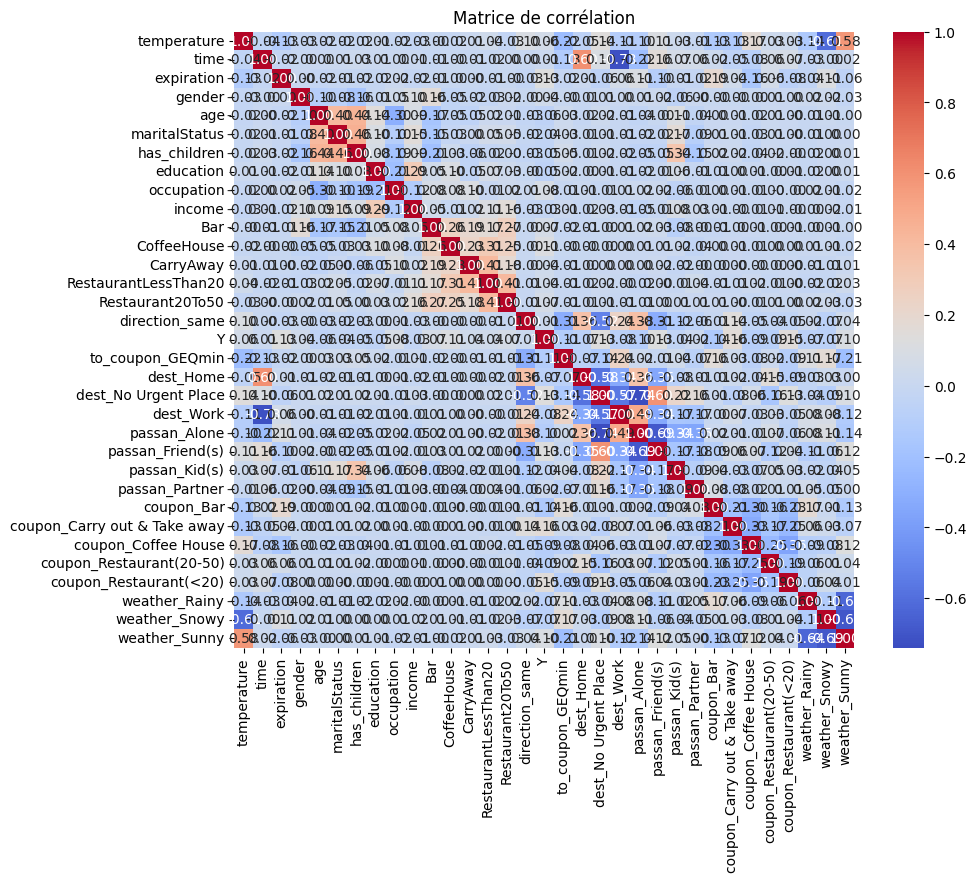

In [296]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

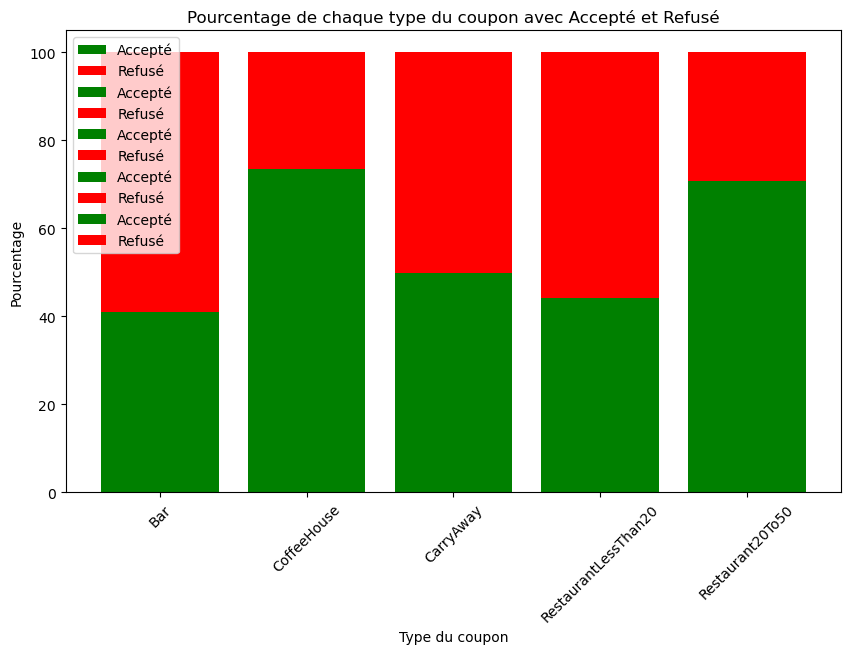

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Données du tableau croisé (assurez-vous que le tableau croisé a été généré comme indiqué dans votre question)
tableau_croise = pd.crosstab(index=data['coupon'], columns=data['Y'], normalize='index') * 100

# Créez un graphique à barres empilées
plt.figure(figsize=(10, 6))

# Liste des types d'occupation
categories = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]

# Couleurs pour accepté (en vert) et refusé (en rouge)
colors = ['green', 'red']

# Boucle sur les catégories
for i, category in enumerate(categories):
    plt.bar(category, tableau_croise.iloc[i][1], label='Accepté', color=colors[0])
    plt.bar(category, tableau_croise.iloc[i][0], label='Refusé', color=colors[1], bottom=tableau_croise.iloc[i][1])


# Ajoutez des étiquettes d'axe et un titre
plt.xlabel("Type du coupon")
plt.ylabel("Pourcentage")
plt.title("Pourcentage de chaque type du coupon avec Accepté et Refusé")

# Ajoutez une légende
plt.legend()

# Faites pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichez le graphique
plt.show()


In [28]:
# Utilisez crosstab pour compter les occurrences de votre variable par rapport à l'acceptation ou le refus du coupon
tableau_croise = pd.crosstab(index=data['weather'], columns=data['Y'], normalize='index') * 100

# Affichez le tableau croisé
print(tableau_croise)

Y                0          1
weather                      
Rainy    53.719008  46.280992
Snowy    52.953737  47.046263
Sunny    40.520409  59.479591


In [29]:
# Utilisez crosstab pour compter les occurrences de votre variable par rapport à l'acceptation ou le refus du coupon
tableau_croise = pd.crosstab(index=data['destination'], columns=data['Y'], normalize='index') * 100

# Affichez le tableau croisé
print(tableau_croise)

Y                        0          1
destination                          
Home             49.366698  50.633302
No Urgent Place  36.622633  63.377367
Work             49.778761  50.221239


In [30]:
counts = data['income'].value_counts()
print("Pourcentage de chaque type de maritalStatus :")
print(counts)

Pourcentage de chaque type de maritalStatus :
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64


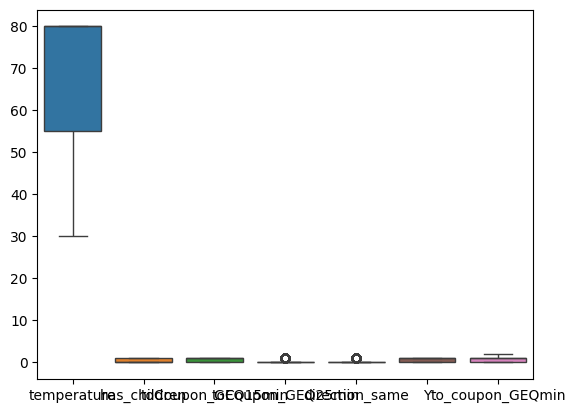

<Figure size 640x480 with 0 Axes>

In [189]:
sns.boxplot(data)
plt.show()
plt.savefig("figure.png")

# PCA

In [33]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Convertir les données du DataFrame en un tableau NumPy avec des types de données numériques
data_array = data.select_dtypes(include=[np.number]).values

# create the PCA instance
# Check for NaN and infinite values in the standardized data
is_nan = np.isnan(data_array)
is_inf = np.isinf(data_array)

# Replace NaN and infinite values with zeros
data_array[is_nan] = 0
data_array[is_inf] = 0

# Create the PCA instance and fit it on the cleaned data
pca = PCA(n_components=None)
reduced_data = pca.fit(data_array)

In [82]:
# Example: Print reduced_values
print("Reduced Values:")
print(reduced_values)

# Example: Access and use the first reduced vector
first_reduced_vector = reduced_vectors[0]
print("First Reduced Vector:")
print(first_reduced_vector)

# Example: Print reduced eigenvalues
print("Reduced Eigenvalues:")
print(reduced_eigenvalues)

# Example: Print variance proportions associated with the axes (eigenvalues)
print("Variance Proportions associated with the axes (Eigenvalues):")
print(reduced_variance_ratio)


Reduced Values:


NameError: name 'reduced_values' is not defined

In [83]:
# transform data/ Projection
reduced_transformd_data = pca.fit_transform(data_array)
reduced_transformed_eigenvalues = pca.explained_variance_
print ('transformed eignvalues: ',reduced_transformed_eigenvalues)

transformed eignvalues:  [3.66877524e+02 4.57882237e-01 2.48425304e-01 2.32792986e-01
 1.44000613e-01]


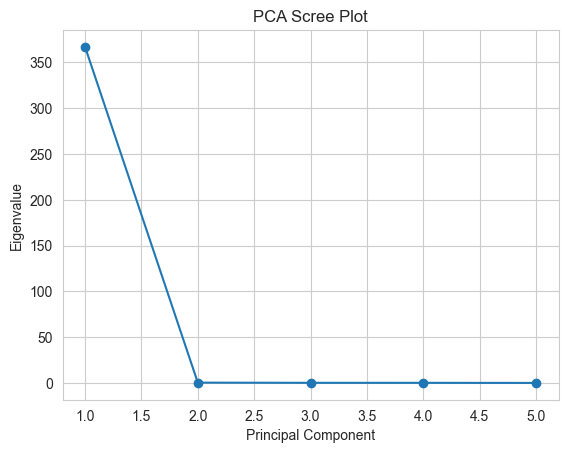

In [84]:

# Create the scree plot
plt.plot(np.arange(1, len(reduced_transformed_eigenvalues) + 1), reduced_transformed_eigenvalues, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()

In [39]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load or generate your data

# Standardize the data (assuming data is stored in the variable data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)

# Check for and handle NaN and infinity values
data_scaled[np.isnan(data_scaled)] = 0
data_scaled[np.isinf(data_scaled)] = 0

# Create the PCA instance
pca = PCA()

# Fit the PCA on the cleaned and scaled data
pca.fit(data_scaled)

# Principal components (eigenvectors)
principal_components = pca.components_
print(principal_components)
print("===================================================")

# Variance proportions associated with the axes (eigenvalues)
explained_variance = pca.explained_variance_
print(explained_variance)
print("===================================================")

# Transform data or perform projection
data_array


[[ 1.89992792e-01 -5.48026468e-02 -3.78352895e-01 -3.02595978e-01
   6.00392860e-01 -6.00392860e-01  7.23947336e-02]
 [-4.91950573e-01  1.00266854e-01  3.14755993e-01  5.07101500e-01
   3.34121968e-01 -3.34121968e-01 -4.10405830e-01]
 [-2.26445317e-01 -8.88039303e-01 -4.44107336e-02  2.24441029e-01
   1.81344212e-02 -1.81344212e-02  3.27268867e-01]
 [-3.51541030e-01  4.06611763e-01  1.23411269e-01  6.40932594e-02
   7.95333303e-02 -7.95333303e-02  8.24073049e-01]
 [-7.19509505e-01  3.99747857e-02 -5.23943740e-01 -3.66720341e-01
  -1.30103391e-01  1.30103391e-01 -1.94559639e-01]
 [ 1.71274247e-01  1.77195695e-01 -6.82684447e-01  6.79939860e-01
  -6.56477254e-02  6.56477254e-02  4.76581875e-02]
 [ 0.00000000e+00  1.02708256e-15  2.61020410e-16 -9.47975084e-17
  -7.07106781e-01 -7.07106781e-01  3.41238453e-16]]
[2.32200466e+00 1.25502645e+00 1.01995925e+00 9.34594017e-01
 8.22416312e-01 6.46554465e-01 9.67079335e-34]


array([[55,  1,  0, ...,  0,  1,  1],
       [80,  1,  0, ...,  0,  1,  0],
       [80,  1,  1, ...,  0,  1,  1],
       ...,
       [30,  0,  0, ...,  1,  0,  0],
       [30,  0,  1, ...,  0,  1,  0],
       [80,  0,  0, ...,  1,  0,  0]], dtype=int64)

In [89]:
Y=data_encoded['Y']
X=data_encoded.drop('Y', axis=1)

In [96]:
 # data
# Y
X

temperature      time  expiration  gender       age  maritalStatus  \
0        -0.431651  0.029504    0.890778       0 -1.108006              0   
1         0.873653 -0.710884   -1.122614       0 -1.108006              0   
2         0.873653 -0.710884   -1.122614       0 -1.108006              0   
3         0.873653  0.029504   -1.122614       0 -1.108006              0   
4         0.873653  0.029504    0.890778       0 -1.108006              0   
...            ...       ...         ...     ...       ...            ...   
12679    -0.431651  0.769892    0.890778       1 -0.617142              1   
12680    -0.431651 -1.266176    0.890778       1 -0.617142              1   
12681    -1.736955 -1.266176    0.890778       1 -0.617142              1   
12682    -1.736955 -1.266176    0.890778       1 -0.617142              1   
12683     0.873653 -1.266176   -1.122614       1 -0.617142              1   

       has_children  education  occupation    income  ...  passan_Kid(s)  \
0                 1  -0.890970   -0.339904 -0.288524  ...              0   
1                 1  -0.890970   -0.339904 -0.288524  ...              0   
2                 1  -0.890970   -0.339904 -0.288524  ...              0   
3                 1  -0.890970   -0.339904 -0.288524  ...              0   
4                 1  -0.890970   -0.339904 -0.288524  ...              0   
...             ...        ...         ...       ...  ...            ...   
12679             0   0.691443   -0.339904  0.891208  ...              0   
12680             0   0.691443   -0.339904  0.891208  ...              0   
12681             0   0.691443   -0.339904  0.891208  ...              0   
12682             0   0.691443   -0.339904  0.891208  ...              0   
12683             0   0.691443   -0.339904  0.891208  ...              0   

       passan_Partner  coupon_Bar  coupon_Carry out & Take away  \
0                   0           0                             0   
1                   0           0                             0   
2                   0           0                             1   
3                   0           0                             0   
4                   0           0                             0   
...               ...         ...                           ...   
12679               1           0                             1   
12680               0           0                             1   
12681               0           0                             0   
12682               0           1                             0   
12683               0           0                             0   

       coupon_Coffee House  coupon_Restaurant(20-50)  coupon_Restaurant(<20)  \
0                        0                         0                       1   
1                        1                         0                       0   
2                        0                         0                       0   
3                        1                         0                       0   
4                        1                         0                       0   
...                    ...                       ...                     ...   
12679                    0                         0                       0   
12680                    0                         0                       0   
12681                    1                         0                       0   
12682                    0                         0                       0   
12683                    0                         1                       0   

       weather_Rainy  weather_Snowy  weather_Sunny  
0                  0              0              1  
1                  0              0              1  
2                  0              0              1  
3                  0              0              1  
4                  0              0              1  
...              ...            ...            ...  
12679              1            

In [97]:
from sklearn.decomposition import PCA
pca = PCA()
# fit on data: Apply PCA on data
dataPCA=data_encoded
dataPCA=pca.fit_transform(dataPCA)
dataPCA

array([[-2.93816540e-01, -9.67317164e-01,  3.19334607e-01, ...,
        -1.13185893e-15,  2.41794219e-16, -6.82068834e-15],
       [-2.93972352e-01, -8.39114178e-01, -1.48033278e+00, ...,
         1.36923233e-14,  6.44292445e-16,  1.27704066e-14],
       [-2.63852475e-01, -8.50871809e-01, -1.15597384e+00, ...,
         1.75789674e-15, -3.74406065e-15,  4.44547304e-15],
       ...,
       [-1.17503721e-01,  4.97493702e-01,  2.37753448e+00, ...,
        -1.07042601e-16, -2.01475934e-17, -1.68001633e-16],
       [-1.39343151e-01,  5.60491933e-01,  2.94983494e+00, ...,
        -6.81018375e-17,  2.98877931e-17, -8.83229909e-17],
       [-9.47508626e-02,  5.75455690e-01, -4.87040646e-01, ...,
        -5.41493737e-17,  9.07592921e-18, -1.44580610e-17]])

In [98]:
#Principal components: eigenvectors
eigenvectors = pca.components_
print("===================================================")
#Variance proportions associated with the axes: eigenvalues.

eigenvalues = pca.explained_variance_ratio_

print("Principal components (eigenvectors):")
print(eigenvectors)

print("Explained variance (eigenvalues):")
print(eigenvalues)

Principal components (eigenvectors):
[[ 4.46291102e-03 -1.49440280e-02 -7.36185297e-03 ... -7.21548220e-04
   3.20833352e-04  4.00714867e-04]
 [-1.14962251e-02  2.73592273e-02 -5.13827742e-02 ... -4.05960005e-03
   2.84128229e-03  1.21831776e-03]
 [-6.61013114e-01 -3.62853275e-01  4.42566576e-01 ...  4.33991678e-02
   1.47224792e-01 -1.90623959e-01]
 ...
 [ 0.00000000e+00 -1.12787018e-16  1.60216758e-17 ...  1.13472978e-01
   1.13472978e-01  1.13472978e-01]
 [-0.00000000e+00 -1.54843194e-16 -1.25695765e-16 ...  6.59138860e-02
   6.59138860e-02  6.59138860e-02]
 [-0.00000000e+00  1.83517860e-16 -7.86971477e-18 ...  3.77648042e-01
   3.77648042e-01  3.77648042e-01]]
Explained variance (eigenvalues):
[1.30343493e-01 1.09467417e-01 7.93476789e-02 7.39217342e-02
 6.91570480e-02 5.76262538e-02 5.46495130e-02 5.02166385e-02
 4.90015464e-02 4.36909092e-02 4.04659991e-02 3.62436506e-02
 2.85335819e-02 2.78135694e-02 2.58046334e-02 1.76039293e-02
 1.46333340e-02 1.38475191e-02 1.22082982e-02 1.0